In [561]:
import pickle
import random
import numpy as np
from PIL import Image
from os import walk, path
import matplotlib.pyplot as plt
import nibabel as nib
import matplotlib.image as mpimg
import scipy

## Visualization of CIFAR

In [353]:
def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [354]:
cifar_test_path = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Skin-Lesion-Classification/data/cifar-10-batches-py/test_batch"

In [355]:
cifar_test_data_dict = unpickle(cifar_test_path)

In [356]:
cifar_test_data = cifar_test_data_dict[b'data']

In [357]:
random.seed(0)

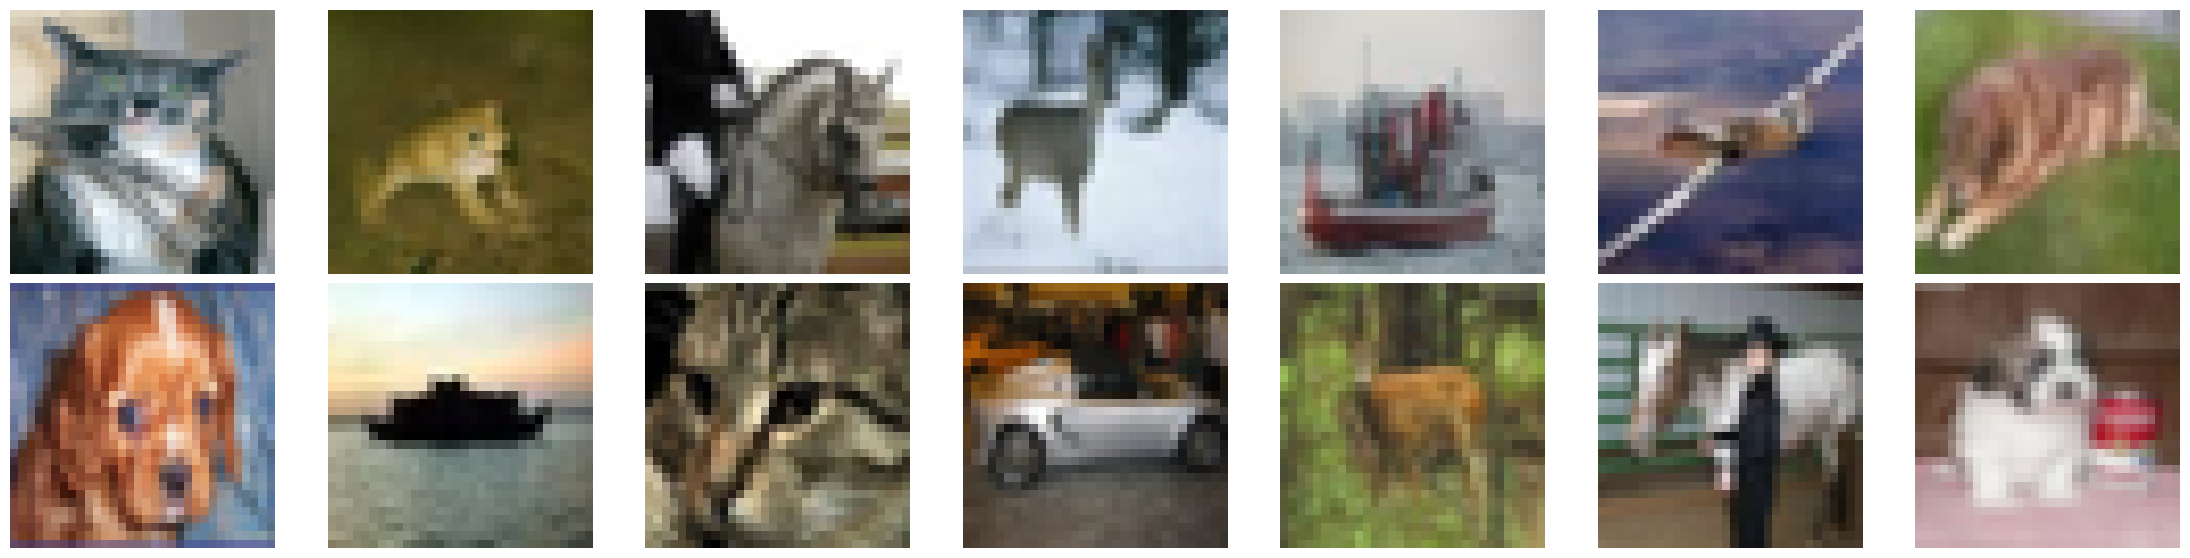

In [358]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

for k in range(7):
    
    rand_num_1 = random.randint(0, len(cifar_test_data)-1)
    rand_num_2 = random.randint(0, len(cifar_test_data)-1)
    
    sel_test_img_1 = cifar_test_data[rand_num_1, :]
    sel_test_img_1 = np.transpose(sel_test_img_1.reshape(3, 32, 32), (1, 2, 0))
    sel_test_img_2 = cifar_test_data[rand_num_2, :]
    sel_test_img_2 = np.transpose(sel_test_img_2.reshape(3, 32, 32), (1, 2, 0))

    axes[0, k].imshow(sel_test_img_1)
    axes[0, k].axis('off')  # Turn off axis labels

    axes[1, k].imshow(sel_test_img_2)
    axes[1, k].axis('off')  # Turn off axis labels

plt.show()

In [359]:
# get the corrupted ones
cifar_c_folder = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Skin-Lesion-Classification/CIFAR-10-C/"

In [360]:
filenames = next(walk(cifar_c_folder), (None, None, []))[2]  # [] if no file
filenames.remove('labels.npy')

In [361]:
random.seed(0)

In [362]:
rand_conds = []
for k in range(7):
    rand_conds.append(random.randint(0, len(filenames))-1)

In [363]:
images_conds = []
for k in range(7):
    images_conds.append(np.load(cifar_c_folder + filenames[k]))

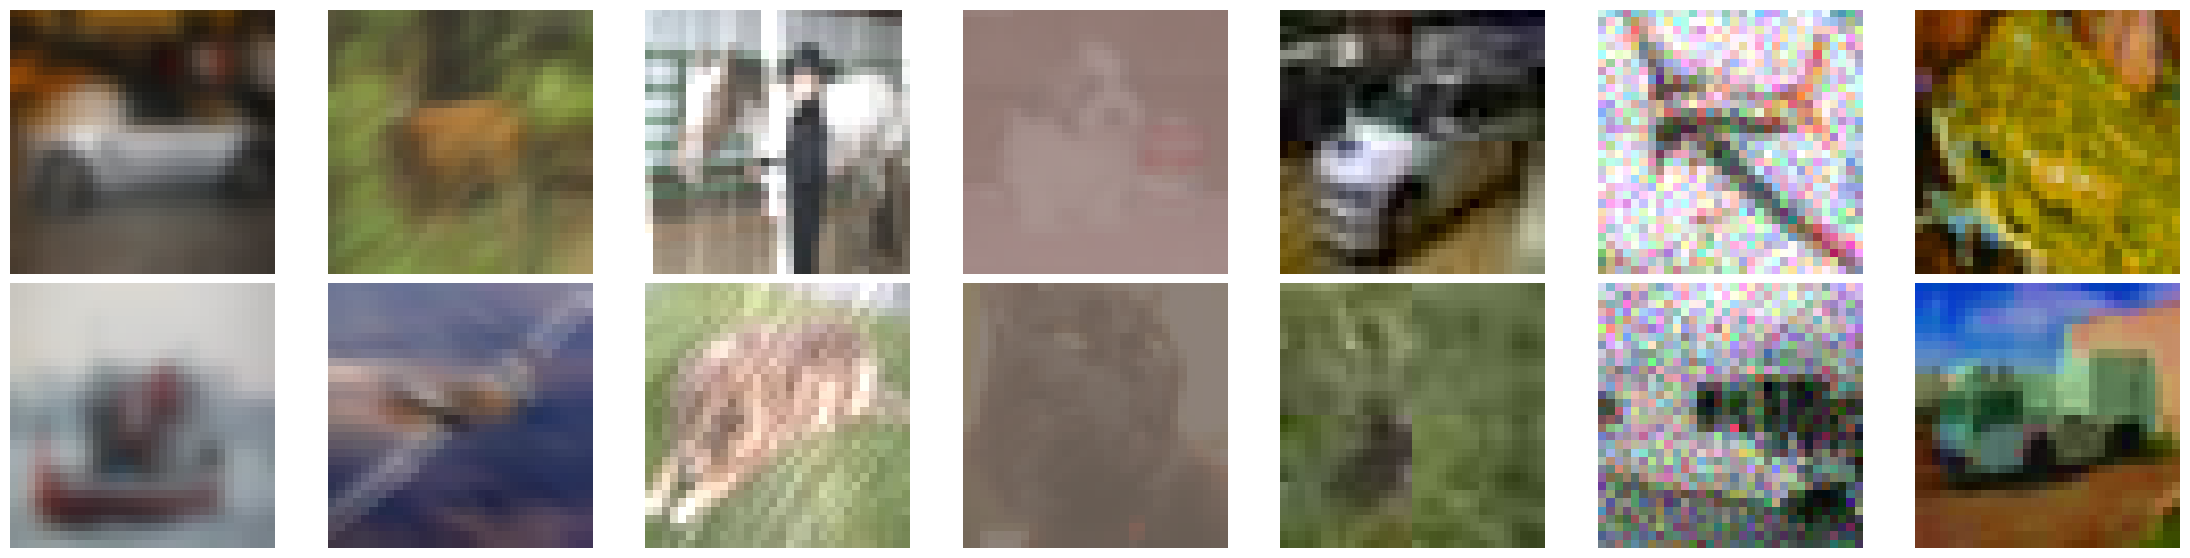

In [364]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

for k in range(7):

    rand_num_1 = random.randint(40000, len(images_conds[k])-1)
    rand_num_2 = random.randint(40000, len(images_conds[k])-1)

    axes[0, k].imshow(images_conds[k][rand_num_1])
    axes[0, k].axis('off')  # Turn off axis labels

    axes[1, k].imshow(images_conds[k][rand_num_2])
    axes[1, k].axis('off')  # Turn off axis labels

plt.show()

## Visualization of Skin Lesion

In [384]:
dataset_path = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Skin-Lesion-Classification/skinlesiondatasets/SkinLesionDatasets/"

In [385]:
test_datat = dataset_path + 'HAMtest'

In [386]:
paths = [x[0] for x in walk(test_datat)]
paths = paths[1:]

In [387]:
random.seed(0)

In [388]:
randpath_num_1 = random.randint(0, len(paths)-1)
randpath_num_2 = random.randint(0, len(paths)-1)

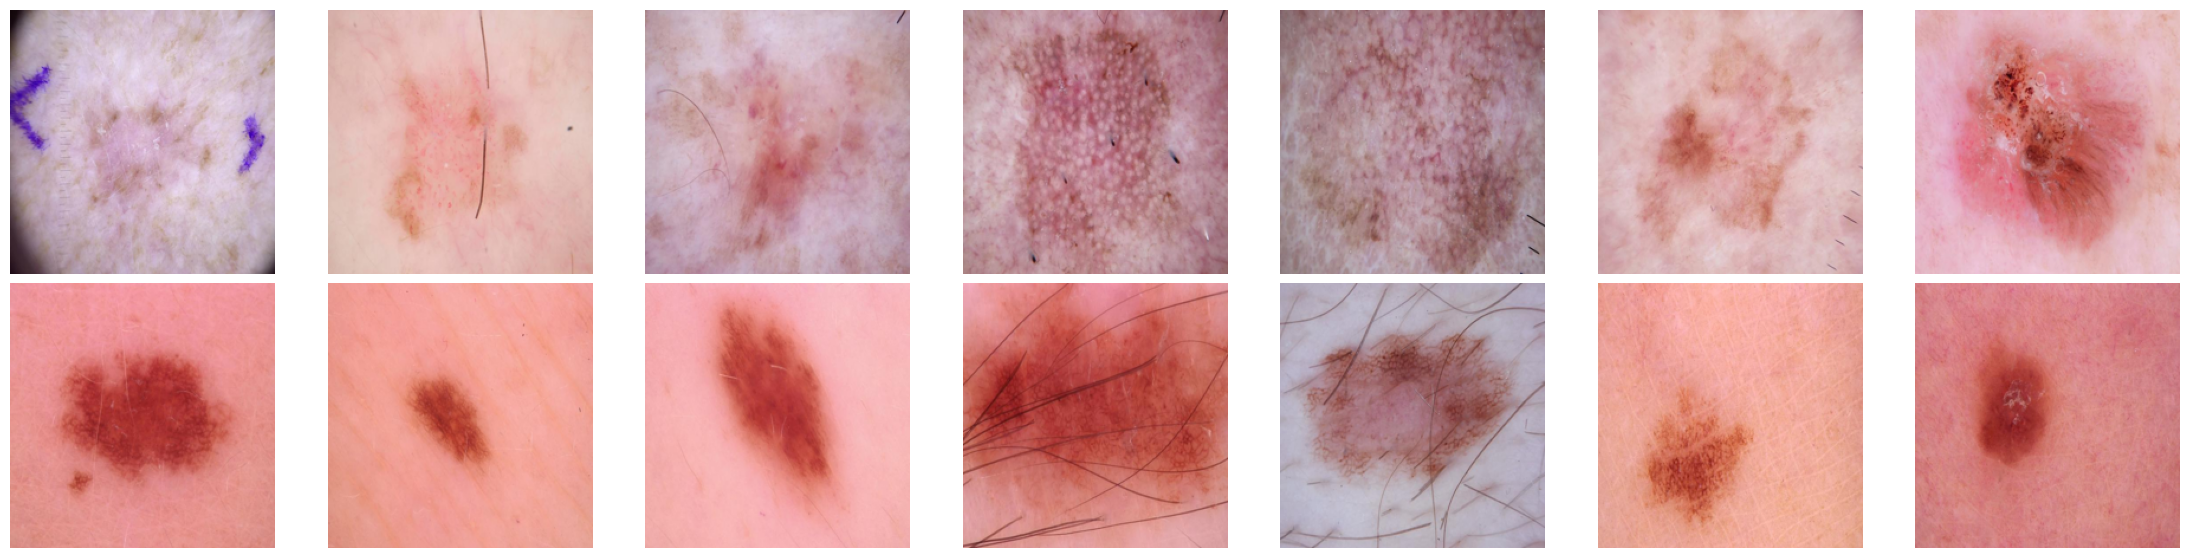

In [389]:
paths# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

for k in range(7):

    folder_1 = paths[randpath_num_1]
    filenames_1 = next(walk(folder_1), (None, None, []))[2]  # [] if no file

    rand_num_1 = random.randint(0, len(filenames_1)-1)
    img_1 = Image.open(folder_1 + '/' + filenames_1[rand_num_1])

    axes[0, k].imshow(img_1.resize((224, 224)))
    axes[0, k].axis('off')  # Turn off axis labels

    folder_2 = paths[randpath_num_2]
    filenames_2 = next(walk(folder_2), (None, None, []))[2]  # [] if no file

    rand_num_2 = random.randint(0, len(filenames_2)-1)
    img_2 = Image.open(folder_2 + '/' + filenames_2[rand_num_2])

    axes[1, k].imshow(img_2.resize((224, 224)))
    axes[1, k].axis('off')  # Turn off axis labels

plt.show()

In [390]:
random.seed(0)

In [391]:
subfolders = next(walk(dataset_path))[1]

In [392]:
subfolders.remove('HAM')
subfolders.remove('HAMtrain')
subfolders.remove('HAMtest')
subfolders.remove('HAMval')

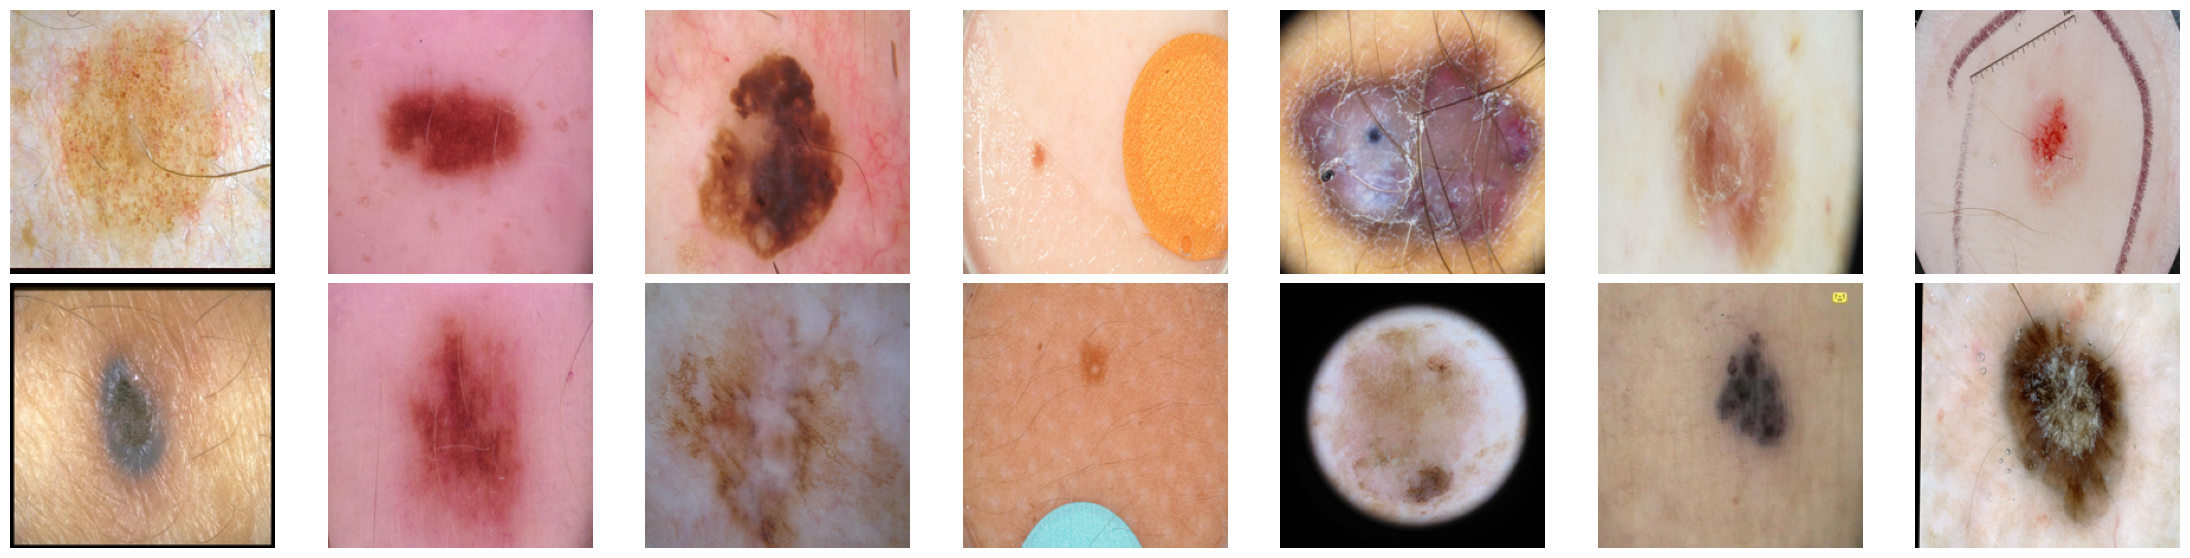

In [393]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

for k in range(7):
    
    cond_path = dataset_path + subfolders[k]
    paths = [x[0] for x in walk(cond_path)]
    paths = paths[1:]
    
    randpath_num_1 = random.randint(0, len(paths)-1)
    folder_1 = paths[randpath_num_1]
    filenames_1 = next(walk(folder_1), (None, None, []))[2]  # [] if no file
    rand_num_1 = random.randint(0, len(filenames_1)-1)
    img_1 = Image.open(folder_1 + '/' + filenames_1[rand_num_1])

    axes[0, k].imshow(img_1.resize((224, 224)))
    axes[0, k].axis('off')  # Turn off axis labels
    
    randpath_num_2 = random.randint(0, len(paths)-1)
    folder_2 = paths[randpath_num_2]
    filenames_2 = next(walk(folder_2), (None, None, []))[2]  # [] if no file
    rand_num_2 = random.randint(0, len(filenames_2)-1)
    img_2 = Image.open(folder_2 + '/' + filenames_2[rand_num_2])

    axes[1, k].imshow(img_2.resize((224, 224)))
    axes[1, k].axis('off')  # Turn off axis labels

plt.show()

## Visualization of Cardiac MRI

In [692]:
def crop_and_pad_image(img, lbl, crop_size, x_centre, y_centre):
    half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)
    
    # Calculate the bounding box for the crop
    x_start = max(x_centre - half_crop_size[0], 0)
    x_end = min(x_centre + half_crop_size[0], img.shape[0])
    y_start = max(y_centre - half_crop_size[1], 0)
    y_end = min(y_centre + half_crop_size[1], img.shape[1])

    # Adjust crop size if it goes out of bounds
    if x_end - x_start < crop_size[0]:
        if x_start == 0:
            x_end = min(crop_size[0], img.shape[0])
        else:
            x_start = max(img.shape[0] - crop_size[0], 0)
    if y_end - y_start < crop_size[1]:
        if y_start == 0:
            y_end = min(crop_size[1], img.shape[1])
        else:
            y_start = max(img.shape[1] - crop_size[1], 0)

    # Crop the image
    cropped_img = img[x_start:x_end, y_start:y_end]
    cropped_lbl = lbl[x_start:x_end, y_start:y_end]
    
    # Calculate padding
    pad_x_before = (crop_size[0] - cropped_img.shape[0]) // 2
    pad_x_after = crop_size[0] - cropped_img.shape[0] - pad_x_before
    pad_y_before = (crop_size[1] - cropped_img.shape[1]) // 2
    pad_y_after = crop_size[1] - cropped_img.shape[1] - pad_y_before

    # Pad the image to ensure it is centered
    padded_img = np.pad(cropped_img, ((pad_x_before, pad_x_after), (pad_y_before, pad_y_after)), mode='constant', constant_values=0)
    padded_lbl = np.pad(cropped_lbl, ((pad_x_before, pad_x_after), (pad_y_before, pad_y_after)), mode='constant', constant_values=0)

    return padded_img, padded_lbl

# below is the one that generate mainly intensity transformations

from __future__ import absolute_import, print_function, division

import collections
import numpy as np
from skimage.transform import resize
from scipy.ndimage import gaussian_filter, gaussian_laplace

def augment_sample(channels, gt_lbls, prms, Imgenlarge, rng=None, proof=0):
    '''If I get a rng, I would assume I want to do test-time augmentation'''
    # channels: list (x pathways) of np arrays [channels, x, y, z]. Whole volumes, channels of a case.
    # gt_lbls: np array of shape [x,y,z]
    # prms: None or Dictionary, with parameters of each augmentation type. }

    # it might have troubles from the multi-process. might be not, because every choice is different.
    # but I also create a local state here, just to be save
    local_state = np.random.RandomState()

    if prms is not None:
        # choose one augmentation here. the chosen one is set to prmssel
        channels, gt_lbls = random_rotation_90(channels, gt_lbls, prms['rotate90'], local_state, rng)
        
        # four color transformations
        # the order should not affect much, I follow the order of batchgenerator
        # the first three should access the whole image for some global statstics
        channels = random_guassian_noise(channels, prms['noise'], local_state, rng, proof)
        channels, Imgenlarge = random_guassian_blur(channels, prms['blur'], Imgenlarge.copy(), local_state, rng, proof)
        channels, Imgenlarge = random_histogram_distortion(channels, prms['hist_dist'], Imgenlarge, local_state, rng, proof)
        channels, Imgenlarge = random_contrast(channels, prms['contrast'], Imgenlarge, local_state, rng, proof)
        channels = simulate_low_resolution(channels, prms['simulowres'], local_state, rng, proof)

        channels, Imgenlarge = random_invgamma_correction(channels, prms['gamma'], Imgenlarge, local_state, rng, proof)
        channels, Imgenlarge = random_gamma_correction(channels, prms['gamma'], Imgenlarge, local_state, rng, proof)

        channels, gt_lbls = random_flip(channels, gt_lbls, prms['reflect'], local_state)

    return channels, gt_lbls


def random_histogram_distortion(channels, prms, Imgenlarge, local_state, rng, proof):
    # Shift and scale the histogram of each channel.
    # channels: list (x pathways) of np arrays [channels, x, y, z]. Whole volumes, channels of a case.
    # prms: { 'shift': {'mu': 0.0, 'std':0.}, 'scale':{'mu': 1.0, 'std': '0.'} }
    if prms is None or prms['shift']['mu'] == 0 and prms['shift']['std'] == 0 and prms['scale']['mu'] ==0 and prms['scale']['std'] == 0:
        return channels, Imgenlarge

    if rng == None:
        ## training mode
        rng1 = local_state.choice((1, -1))
        rng2 = local_state.choice((1, -1))
        if prms['shift']['mu'] > 0:
            shiftmu = rng1 * local_state.uniform(np.max((0, prms['shift']['mu'] - 0.05)), prms['shift']['mu'] + 0.05)
            scalemu = 1 + local_state.uniform(np.max((0, prms['scale']['mu'] - 0.05)), prms['scale']['mu'] + 0.05)
        else:
            shiftmu = rng1 * local_state.uniform(0, - prms['shift']['mu'])
            scalemu = 1 + local_state.uniform(0, - prms['scale']['mu'])
    else:
        rng1 = rng
        rng2 = rng
        shiftmu = rng1 * prms['shift']['mu']
        scalemu = 1 + prms['scale']['mu']
    if rng2 < 0:
        scalemu = 1 / scalemu

    n_channs = channels[0].shape[0]
    if prms['shift'] is None:
        shift_per_chan = 0.
    elif prms['shift']['std'] != 0:  # np.random.normal does not work for an std==0.
        shift_per_chan = local_state.normal(shiftmu, prms['shift']['std'], [n_channs, 1, 1, 1])
    else:
        shift_per_chan = np.ones([n_channs, 1, 1, 1], dtype="float32") * shiftmu

    if prms['scale'] is None:
        scale_per_chan = 1.
    elif prms['scale']['std'] != 0:
        scale_per_chan = local_state.normal(scalemu, prms['scale']['std'], [n_channs, 1, 1, 1])
    else:
        scale_per_chan = np.ones([n_channs, 1, 1, 1], dtype="float32") * scalemu

    Imgenlarge = (Imgenlarge + shift_per_chan) * scale_per_chan

    # Intensity augmentation
    for path_idx in range(len(channels)):
        if proof == 0:
            channels[path_idx] = (channels[path_idx] + shift_per_chan) * scale_per_chan
        else:
            if np.sum(shift_per_chan) != 0 or np.mean(scale_per_chan) != 1:
                channels[path_idx] = channels[path_idx] * 0 - 1

    return channels, Imgenlarge

def random_contrast(channels, prms, Imgenlarge, local_state, rng, proof):
    # - mean and multiply a scalar
    # I should take the whole image as ref.
    # channels: list (x pathways) of np arrays [channels, x, y, z]. Whole volumes, channels of a case.
    # prms: { 'factor': 0. }
    if prms is None or prms['factor'] == 0:
        return channels, Imgenlarge

    if rng == None:
        ## training mode
        rng = local_state.choice((1, -1))
        if prms['factor'] > 0:
            factor = 1 + local_state.uniform(np.max((0, prms['factor'] - 0.05)), prms['factor'] + 0.05)
        else:
            factor = 1 + local_state.uniform(0, prms['factor'])
    else:
        factor = 1 + prms['factor']
    
    if rng < 0:
        factor = 1 / factor

    mns = []
    maxms = []
    minms = []
    # in case we are sampling like Deepmedic, I should keep the pixel absolute intensity similar.
    for c in range(channels[0].shape[0]):
        mns.append(Imgenlarge[c].mean())
        maxms.append(Imgenlarge[c].max())
        minms.append(Imgenlarge[c].min())
        Imgenlarge[c] = (Imgenlarge[c] - mns[c]) * factor + mns[c]
        Imgenlarge[c][Imgenlarge[c] < minms[c]] = minms[c]
        Imgenlarge[c][Imgenlarge[c] > maxms[c]] = maxms[c]

    for path_idx in range(len(channels)):
        for c in range(channels[path_idx].shape[0]):
            ## to retain stats
            channels[path_idx][c] = (channels[path_idx][c] - mns[c]) * factor + mns[c]
            channels[path_idx][c][channels[path_idx][c] < minms[c]] = minms[c]
            channels[path_idx][c][channels[path_idx][c] > maxms[c]] = maxms[c]

    return channels, Imgenlarge

def random_guassian_noise(channels, prms, local_state, rng, proof):
    # Add gaussian noise
    if prms is None or prms['std'] == 0:
        return channels

    if rng == None:
        ## training mode
        if prms['std'] > 0:
            noise_std = local_state.uniform(np.max((0, prms['std'] - 0.025)), prms['std'] + 0.025)
        else:
            noise_std = local_state.uniform(0, - prms['std'])
    else:
        noise_std = prms['std'] 

    # Intensity augmentation

    for path_idx in range(len(channels)):
        if proof == 0:
            shift_per_chan = local_state.normal(0, noise_std, [channels[path_idx].shape[0], channels[path_idx].shape[1],
                                                               channels[path_idx].shape[2], channels[path_idx].shape[3]])
            channels[path_idx] = channels[path_idx] + shift_per_chan
        else :
            # the ridiculous augmentation.
            if prms['std'] > 0 :
                # print('dangerous here')
                channels[path_idx] = channels[path_idx] * 0 + 1

    return channels

def random_guassian_blur(channels, prms, Imgenlarge, local_state, rng, proof):
    # Add gaussian noise
    if prms is None or prms['sigma'] == 0:
        return channels, Imgenlarge
    
    if rng == None:
        ## training mode
        if prms['sharpen'] == False:
            if prms['sigma'] > 0:
                blur_sigma = local_state.uniform(prms['sigma'] - 0.1, prms['sigma'] + 0.1)
            else:
                blur_sigma = local_state.uniform(0.4, - prms['sigma'])
        else:
            if prms['sigma'] > 0:
                blur_sigma = local_state.uniform(prms['sigma'] - 0.1, prms['sigma'] + 0.1)
            else:
                blur_sigma = local_state.uniform(- prms['sigma'], 1.)
    else:
        blur_sigma = prms['sigma']

    # save the statistic
    maxms = []
    minms = []
    for c in range(channels[0].shape[0]):
        maxms.append(Imgenlarge[c].max())
        minms.append(Imgenlarge[c].min())

    # blur
    for path_idx in range(len(channels)):
        for c in range(channels[path_idx].shape[0]):
            if prms['sharpen'] == False:
                channels[path_idx][c] = gaussian_filter(channels[path_idx][c], blur_sigma, order=0)
            else:
                channels[path_idx][c] = channels[path_idx][c] - gaussian_laplace(channels[path_idx][c], blur_sigma)
                channels[path_idx][c][channels[path_idx][c] < minms[c]] = minms[c]
                channels[path_idx][c][channels[path_idx][c] > maxms[c]] = maxms[c]
                

    return channels, Imgenlarge

def simulate_low_resolution(channels, prms, local_state, rng, proof):
    # simulate the low resolution
    order_downsample=1
    order_upsample=0
    if prms is None or prms['zoom'] == 1:
        return channels

    if rng == None:
        ## training mode
        if prms['zoom'] > 0:
            simlscale = local_state.uniform(prms['zoom'] - 0.1, prms['zoom'] + 0.1)
        else:
            simlscale = local_state.uniform(- prms['zoom'], 1.)
    else:
        simlscale = prms['zoom']

    # zoom in
    for path_idx in range(len(channels)):
        for c in range(channels[path_idx].shape[0]):
            shp = np.array(channels[path_idx].shape[1:])
            target_shape = np.round(shp * simlscale).astype(int)
            downsampled = resize(channels[path_idx][c].astype(float), target_shape, order=order_downsample, mode='edge',
                                anti_aliasing=False)
            channels[path_idx][c] = resize(downsampled, shp, order=order_upsample, mode='edge',
                                    anti_aliasing=False)

    return channels

def random_gamma_correction(channels, prms, Imgenlarge, local_state, rng, proof):
    # Gamma correction
    if prms is None or prms['gamma'] == 0:
        return channels, Imgenlarge

    if proof == 0:
        epsilon = 1e-6
        if rng == None:
            ## training mode
            rng = local_state.choice((1, -1))
            if prms['gamma'] > 0 :
                gamma = 1 + local_state.uniform(np.max((0, prms['gamma'] - 0.1)), prms['gamma'] + 0.1)
            else:
                gamma = 1 + local_state.uniform(0, - prms['gamma'])
        else:
            gamma = 1 + prms['gamma']
            # 
        if rng < 0:
            gamma = 1 / gamma
        
        minms = []
        rnges = []
        mns = []
        sds = []
        # in case we are sampling like Deepmedic, I should keep the pixel absolute intensity similar.
        for c in range(channels[0].shape[0]):
            minms.append(Imgenlarge[c].min())
            rnges.append(Imgenlarge[c].max() - Imgenlarge[c].min())
            mns.append(Imgenlarge[c].mean())
            sds.append(Imgenlarge[c].std())

        for path_idx in range(len(channels)):
            for c in range(channels[path_idx].shape[0]):
                ## to retain stats
                if rnges[c] != 0 and sds[c] != 0:
                    # Jan 27, 2021, fix a bug here.
                    minm = np.min((channels[path_idx][c].min(), Imgenlarge[c].min()))
                    maxm = np.max((channels[path_idx][c].max(), Imgenlarge[c].max()))
                    rnge = maxm - minm
                    # in case the minimum is sampled out, it should not happen very often I suppose
                    channels[path_idx][c] = np.power(((channels[path_idx][c] - minm) / float(rnge + epsilon)), gamma) * float(rnge + epsilon) + minm
                    
                    mn = Imgenlarge[c].mean()
                    sd = Imgenlarge[c].std()

                    Imgenlarge[c] = np.power(((Imgenlarge[c] - minm) / float(rnge + epsilon)), gamma) * float(rnge + epsilon) + minm

                    mnafter = Imgenlarge[c].mean()
                    
                    Imgenlarge[c] = Imgenlarge[c] - mnafter + mn
                    sdafter = Imgenlarge[c].std()

                    Imgenlarge[c] = Imgenlarge[c] / (sdafter + epsilon) * (sd + epsilon)

                    channels[path_idx][c] = channels[path_idx][c] - mnafter + mn
                    channels[path_idx][c] = channels[path_idx][c] / (sdafter + epsilon) * (sd + epsilon)

                else:
                    # if it is a blank, do not process.
                    # it is different from nnunet, it does not happen this case.
                    channels[path_idx][c] = channels[path_idx][c]
    else:
        # the ridiculous augmentation.
        for path_idx in range(len(channels)):
            if prms['gamma'] > 0 :
                channels[path_idx] = - channels[path_idx] * 0

    return channels, Imgenlarge

def random_invgamma_correction(channels, prms, Imgenlarge, local_state, rng, proof):
    # Inverted Gamma correction
    if prms is None or prms['invgamma'] == 0:
        return channels, Imgenlarge

    epsilon = 1e-6
    if rng == None:
        ## training mode
        rng = local_state.choice((1, -1))
        if prms['invgamma'] > 0 :
            gamma = 1 + local_state.uniform(np.max((0, prms['invgamma'] - 0.1)), prms['invgamma'] + 0.1)
        else:
            gamma = 1 + local_state.uniform(0, - prms['invgamma'])
    else:
        gamma = 1 + prms['invgamma']

    if rng < 0:
        gamma = 1 / gamma
    
    minms = []
    rnges = []
    mns = []
    sds = []
    Imgenlarge = - Imgenlarge
    for c in range(channels[0].shape[0]):
        minms.append(Imgenlarge[c].min())
        rnges.append(Imgenlarge[c].max() - Imgenlarge[c].min())
        mns.append(Imgenlarge[c].mean())
        sds.append(Imgenlarge[c].std())

    for path_idx in range(len(channels)):
        for c in range(channels[path_idx].shape[0]):
            channels[path_idx][c] = - channels[path_idx][c]
            if rnges[c] != 0 and sds[c] != 0:
                # Jan 27, 2021, fix a bug here.
                minm = np.min((channels[path_idx][c].min(), Imgenlarge[c].min()))
                maxm = np.max((channels[path_idx][c].max(), Imgenlarge[c].max()))
                rnge = maxm - minm
                # in case the minimum is sampled out, it should not happen very often I suppose
                channels[path_idx][c] = np.power(((channels[path_idx][c] - minm) / float(rnge + epsilon)), gamma) * float(rnge + epsilon) + minm
                
                mn = Imgenlarge[c].mean()
                sd = Imgenlarge[c].std()

                Imgenlarge[c] = np.power(((Imgenlarge[c] - minm) / float(rnge + epsilon)), gamma) * float(rnge + epsilon) + minm

                mnafter = Imgenlarge[c].mean()
                
                Imgenlarge[c] = Imgenlarge[c] - mnafter + mn
                sdafter = Imgenlarge[c].std()

                Imgenlarge[c] = Imgenlarge[c] / (sdafter + epsilon) * (sd + epsilon)

                channels[path_idx][c] = channels[path_idx][c] - mnafter + mn
                channels[path_idx][c] = channels[path_idx][c] / (sdafter + epsilon) * (sd + epsilon)

            else:
                # if it is a blank, do not process.
                # it is different from nnunet, it does not happen this case.
                channels[path_idx][c] = channels[path_idx][c]
            channels[path_idx][c] = - channels[path_idx][c]

    return channels, - Imgenlarge

def random_flip(channels, gt_lbls, probs_flip_axes, local_state):
    # Flip (reflect) along each axis.
    # channels: list (x pathways) of np arrays [channels, x, y, z]. Whole volumes, channels of a case.
    # gt_lbls: np array of shape [x,y,z]
    # probs_flip_axes: list of probabilities, one per axis.
    if probs_flip_axes is None:
        return channels, gt_lbls

    for axis_idx in range(len(channels[0].shape[1:])):  # 3 dims
        flip = local_state.choice(a=(True, False), size=1, p=(probs_flip_axes[axis_idx], 1. - probs_flip_axes[axis_idx]))
        if flip:
            for path_idx in range(len(channels)):
                channels[path_idx] = np.flip(channels[path_idx], axis=axis_idx + 1)  # + 1 because dim [0] is channels.
            if gt_lbls is not None:
                gt_lbls = np.flip(gt_lbls, axis=axis_idx)

    return channels, gt_lbls


def random_rotation_90(channels, gt_lbls, probs_rot_90, local_state, rng):
    # Rotate by 0/90/180/270 degrees.
    # channels: list (x pathways) of np arrays [channels, x, y, z]. Whole volumes, channels of a case.
    # gt_lbls: np array of shape [x,y,z]
    # probs_rot_90: {'xy': {'0': fl, '90': fl, '180': fl, '270': fl},
    #                'yz': {'0': fl, '90': fl, '180': fl, '270': fl},
    #                'xz': {'0': fl, '90': fl, '180': fl, '270': fl} }
    if probs_rot_90 is None:
        return channels, gt_lbls

    if rng == None:
        rng = local_state.choice((1, -1))

    for key, plane_axes in zip(['xy', 'yz', 'xz'], [(0, 1), (1, 2), (0, 2)]):
        probs_plane = probs_rot_90[key]

        if probs_plane is None:
            continue

        assert len(probs_plane) == 4  # rotation 0, rotation 90 degrees, 180, 270.
        # assert channels[0].shape[1 + plane_axes[0]] == channels[0].shape[1 + plane_axes[1]]  
        # # +1 cause [0] is channel. Image/patch must be isotropic.

        # Normalize probs
        sum_p = probs_plane['0'] + probs_plane['90'] + probs_plane['180'] + probs_plane['270']
        if sum_p == 0:
            continue
        for rot_k in probs_plane:
            probs_plane[rot_k] /= sum_p  # normalize p to 1.

        p_rot_90_x0123 = (probs_plane['0'], probs_plane['90'], probs_plane['180'], probs_plane['270'])

        if np.max(p_rot_90_x0123) < 1:
            # need rng to make the choice]
            if key == 'xz':
                ## this direction is inverse
                if rng == -1:
                    p_rot_90_x0123 = (probs_plane['0'], 1.0, probs_plane['180'], 0.0)
                else:
                    p_rot_90_x0123 = (probs_plane['0'], 0.0, probs_plane['180'], 1.0)
            else:    
                if rng == 1:
                    p_rot_90_x0123 = (probs_plane['0'], 1.0, probs_plane['180'], 0.0)
                else:
                    p_rot_90_x0123 = (probs_plane['0'], 0.0, probs_plane['180'], 1.0)

        rot_90_xtimes = local_state.choice(a=(0, 1, 2, 3), size=1, p=p_rot_90_x0123)

        for path_idx in range(len(channels)):
            channels[path_idx] = np.rot90(channels[path_idx], k=rot_90_xtimes,
                                          axes=[axis + 1 for axis in plane_axes])  # + 1 cause [0] is channels.
        if gt_lbls is not None:
            gt_lbls = np.rot90(gt_lbls, k=rot_90_xtimes, axes=plane_axes)

    return channels, gt_lbls

class AugmenterParams(object):
    # Parent class, for parameters of augmenters.
    def __init__(self, prms):
        # prms: dictionary
        self._prms = collections.OrderedDict()
        self._set_from_dict(prms)

    def __str__(self):
        return str(self._prms)

    def __getitem__(self, key):  # overriding the [] operator.
        # key: string.
        return self._prms[key] if key in self._prms else None

    def __setitem__(self, key, item):  # For instance[key] = item assignment
        self._prms[key] = item

    def _set_from_dict(self, prms):
        if prms is not None:
            for key in prms.keys():
                self._prms[key] = prms[key]

class AugmenterAffineParams(AugmenterParams):
    def __init__(self, prms):
        # Default values.
        self._prms = collections.OrderedDict([('prob', 0.0),
                                              ('rot_xyz', (45., 45., 45.)),
                                              ('scaling', .1),
                                              ('seed', None),
                                              # For calls.
                                              ('interp_order_imgs', 3),
                                              ('interp_order_lbls', 1),
                                              ('interp_order_roi', 0),
                                              ('interp_order_wmaps', 1),
                                            #   ('boundary_mode', 'nearest'),
                                              ('boundary_mode', 'constant'),
                                              ('cval', 0.)])
        # Overwrite defaults with given.
        self._set_from_dict(prms)

    def __str__(self):
        return str(self._prms)

def get_augment_par():

    augm_sample_prms_tr = {'gamma3': None}
    augm_sample_prms_tr['gamma3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0.5, 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['gamma3invert'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.5}, 'simulowres': {'zoom': 1.}}   
    augm_sample_prms_tr['brightnessadd3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0.25, 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}                          
    augm_sample_prms_tr['brightnessmul3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0.25, 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['contrast3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.25}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['blur3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0.9, 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['sharpen3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0.5, 'sharpen': True},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['noise3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.125}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 1.}}
    augm_sample_prms_tr['simulowres3'] = {'prob': 1.,
                                      'hist_dist': {'shift': {'mu': 0., 'std': 0.}, 'scale': {'mu': 0., 'std': 0.}},
                                      'contrast': {'factor': 0.}, 'reflect': (0., 0., 0.), 'blur': {'sigma': 0., 'sharpen': False},
                                      'rotate90': {'xy': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'yz': {'0': 0., '90': 0., '180': 0., '270': 0.},
                                                   'xz': {'0': 0., '90': 0., '180': 0., '270': 0.}},
                                      'noise': {'std': 0.}, 'gamma': {'gamma': 0., 'invgamma': 0.}, 'simulowres': {'zoom': 0.5}}  
    return augm_sample_prms_tr

def get_augm_img(imgload_1, prmssel_cnt):
    channels = imgload_1[None, :]
    augms_prms = get_augment_par()
    kcount = 0
    for key in augms_prms:
        if kcount == prmssel_cnt:
            prmssel = augms_prms[key]
            break
        kcount += 1

    rng = random.choice((1,-1))

    channels_per_path = []
    channels_per_path.append(channels.copy())

    Imgenlargeref = channels[:, ::4, ::4, ::4]

    (channs_of_sample_per_path, _) = augment_sample(channels_per_path,
                                                None, prmssel, Imgenlargeref, rng, 0)
    channels_augment = channs_of_sample_per_path[0]
    
    return channels_augment[0, :, :, :]

In [718]:
cardiac_dataset_path = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Medical-Segmentation/data/Dataset_Cardiac/"

In [719]:
traindomain = "1"

In [720]:
random.seed(0)

In [721]:
paths = [x[0] for x in walk(cardiac_dataset_path + traindomain)]
paths = paths[1:]

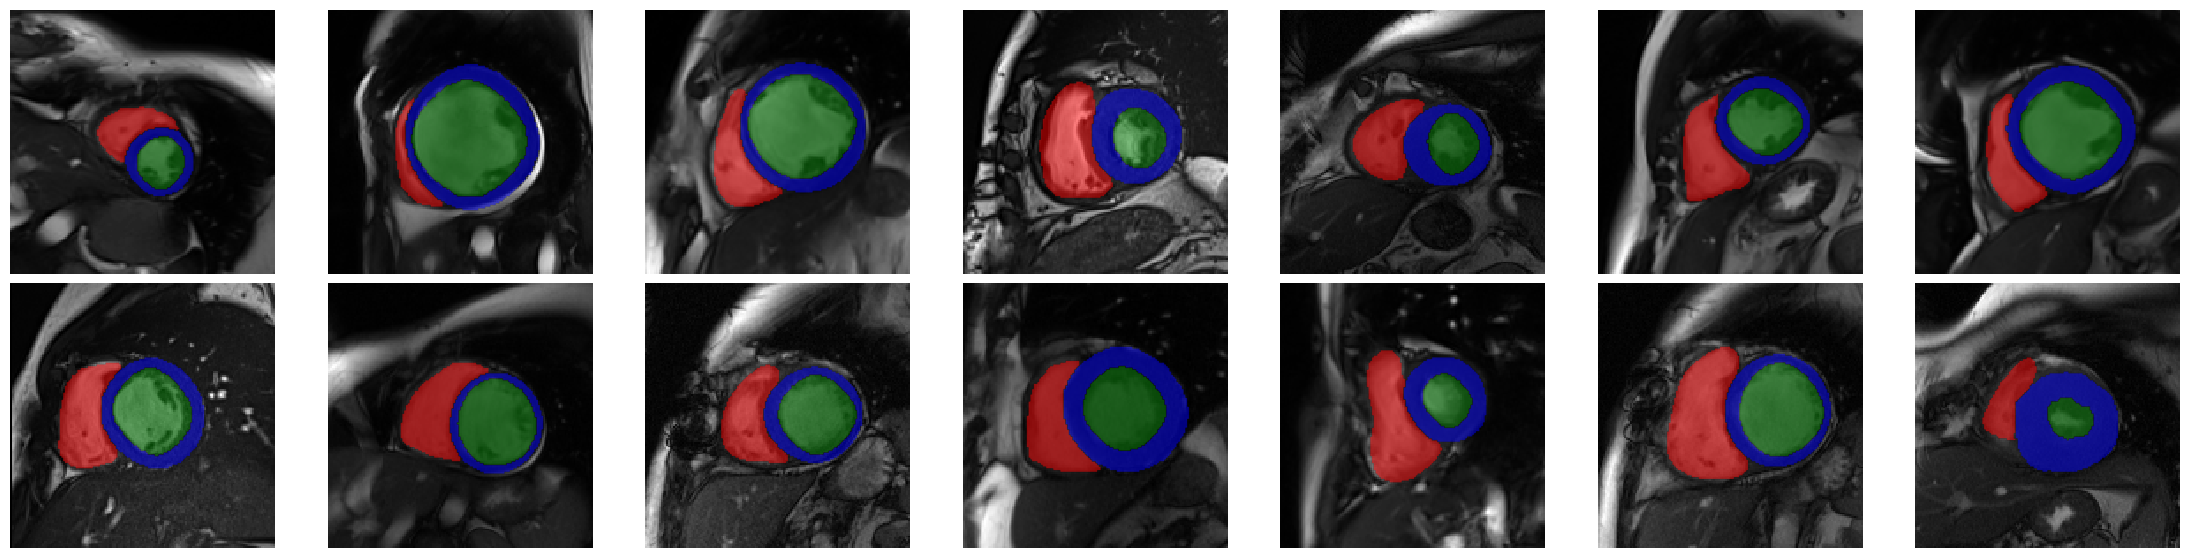

In [722]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (150, 150)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    randpath_num_1 = random.randint(0, len(paths)-1)
    
    imgpath_1 = paths[randpath_num_1] + '/image.nii.gz'
    lblpath_1 = paths[randpath_num_1] + '/seg.nii.gz'
    imgload_1 = nib.load(imgpath_1).get_data()
    lblload_1 = nib.load(lblpath_1).get_data()
    
    center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)
    
    ranslice_1 = round(center_of_mass_1[2])
    imgload_slice_1 = imgload_1[:, :, ranslice_1]
    lblload_slice_1 = lblload_1[:, :, ranslice_1]
    
    center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
    x_centre = round(center_of_mass_slice_1[0])
    y_centre = round(center_of_mass_slice_1[1])
    
    imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
    imgload_slice_1 = imgload_slice_1.T
    lblload_slice_1 = lblload_slice_1.T
    
    class_colors = ['', 'green', 'blue', 'red']

    # Display the original image in grayscale
    axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_1 == i
        label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[0, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[0, k].axis('off')
    
    ################################################
    randpath_num_2 = random.randint(0, len(paths)-1)
    
    imgpath_2 = paths[randpath_num_2] + '/image.nii.gz'
    lblpath_2 = paths[randpath_num_2] + '/seg.nii.gz'
    imgload_2 = nib.load(imgpath_2).get_data()
    lblload_2 = nib.load(lblpath_2).get_data()
    
    center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)
    
    ranslice_2 = round(center_of_mass_2[2])
    imgload_slice_2 = imgload_2[:, :, ranslice_2]
    lblload_slice_2 = lblload_2[:, :, ranslice_2]
    
    center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
    x_centre = round(center_of_mass_slice_2[0])
    y_centre = round(center_of_mass_slice_2[1])
    
    imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
    imgload_slice_2 = imgload_slice_2.T
    lblload_slice_2 = lblload_slice_2.T
    
    class_colors = ['', 'green', 'blue', 'red']

    # Display the original image in grayscale
    axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_2 == i
        label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[1, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[1, k].axis('off')

# Show the plot
plt.show()

In [723]:
subfolders = next(walk(cardiac_dataset_path))[1]
subfolders.remove('1')
random.seed(0)

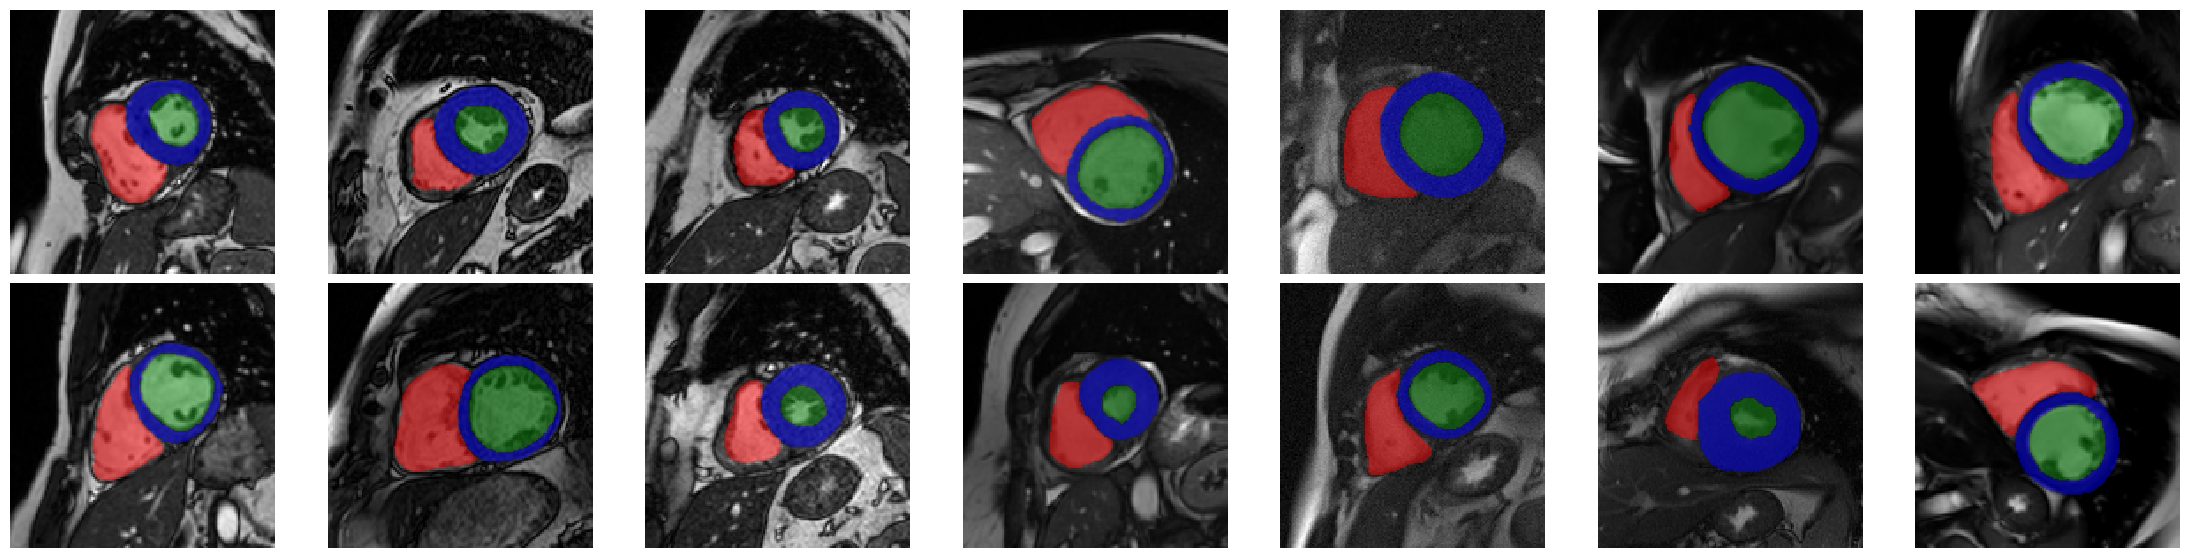

In [724]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (150, 150)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    if k < 4:
        # natural
        subfolder = subfolders[k]
        paths_ = [x[0] for x in walk(cardiac_dataset_path + subfolder)]
        paths_ = paths_[1:]
    
        randpath_num_1 = random.randint(0, len(paths_)-1)

        imgpath_1 = paths_[randpath_num_1] + '/image.nii.gz'
        lblpath_1 = paths_[randpath_num_1] + '/seg.nii.gz'
        imgload_1 = nib.load(imgpath_1).get_data()
        lblload_1 = nib.load(lblpath_1).get_data()

        center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)

        ranslice_1 = round(center_of_mass_1[2])
        imgload_slice_1 = imgload_1[:, :, ranslice_1]
        lblload_slice_1 = lblload_1[:, :, ranslice_1]

        center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
        x_centre = round(center_of_mass_slice_1[0])
        y_centre = round(center_of_mass_slice_1[1])

        imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
        imgload_slice_1 = imgload_slice_1.T
        lblload_slice_1 = lblload_slice_1.T

        class_colors = ['', 'green', 'blue', 'red']

        # Display the original image in grayscale
        axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_1 == i
            label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[0, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[0, k].axis('off')

        ################################################
        randpath_num_2 = random.randint(0, len(paths_)-1)

        imgpath_2 = paths_[randpath_num_2] + '/image.nii.gz'
        lblpath_2 = paths_[randpath_num_2] + '/seg.nii.gz'
        imgload_2 = nib.load(imgpath_2).get_data()
        lblload_2 = nib.load(lblpath_2).get_data()

        center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)

        ranslice_2 = round(center_of_mass_2[2])
        imgload_slice_2 = imgload_2[:, :, ranslice_2]
        lblload_slice_2 = lblload_2[:, :, ranslice_2]

        center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
        x_centre = round(center_of_mass_slice_2[0])
        y_centre = round(center_of_mass_slice_2[1])

        imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
        imgload_slice_2 = imgload_slice_2.T
        lblload_slice_2 = lblload_slice_2.T

        class_colors = ['', 'green', 'blue', 'red']

        # Display the original image in grayscale
        axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_2 == i
            label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[1, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[1, k].axis('off')
    
    else:
        # synthetic
        
        randpath_num_1 = random.randint(0, len(paths)-1)
    
        imgpath_1 = paths[randpath_num_1] + '/image.nii.gz'
        lblpath_1 = paths[randpath_num_1] + '/seg.nii.gz'
        imgload_1 = nib.load(imgpath_1).get_data()
        lblload_1 = nib.load(lblpath_1).get_data()
        
        syncond = random.randint(0, 9)
        imgload_1 = get_augm_img(imgload_1, syncond)

        center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)

        ranslice_1 = round(center_of_mass_1[2])
        imgload_slice_1 = imgload_1[:, :, ranslice_1]
        lblload_slice_1 = lblload_1[:, :, ranslice_1]

        center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
        x_centre = round(center_of_mass_slice_1[0])
        y_centre = round(center_of_mass_slice_1[1])

        imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
        imgload_slice_1 = imgload_slice_1.T
        lblload_slice_1 = lblload_slice_1.T

        class_colors = ['', 'green', 'blue', 'red']

        # Display the original image in grayscale
        axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_1 == i
            label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[0, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[0, k].axis('off')

        ################################################
        randpath_num_2 = random.randint(0, len(paths)-1)

        imgpath_2 = paths[randpath_num_2] + '/image.nii.gz'
        lblpath_2 = paths[randpath_num_2] + '/seg.nii.gz'
        imgload_2 = nib.load(imgpath_2).get_data()
        lblload_2 = nib.load(lblpath_2).get_data()
        
        imgload_2 = get_augm_img(imgload_2, syncond)

        center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)

        ranslice_2 = round(center_of_mass_2[2])
        imgload_slice_2 = imgload_2[:, :, ranslice_2]
        lblload_slice_2 = lblload_2[:, :, ranslice_2]

        center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
        x_centre = round(center_of_mass_slice_2[0])
        y_centre = round(center_of_mass_slice_2[1])

        imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
        imgload_slice_2 = imgload_slice_2.T
        lblload_slice_2 = lblload_slice_2.T

        class_colors = ['', 'green', 'blue', 'red']

        # Display the original image in grayscale
        axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_2 == i
            label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[1, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[1, k].axis('off')
        

# Show the plot
plt.show()

## Visualization of Prostate MRI

In [744]:
prostate_dataset_path = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Medical-Segmentation/data/Dataset_Prostate/"

In [745]:
traindomain = "BMC"

In [746]:
random.seed(0)

In [747]:
paths = [x[0] for x in walk(prostate_dataset_path + traindomain)]
paths = paths[1:]

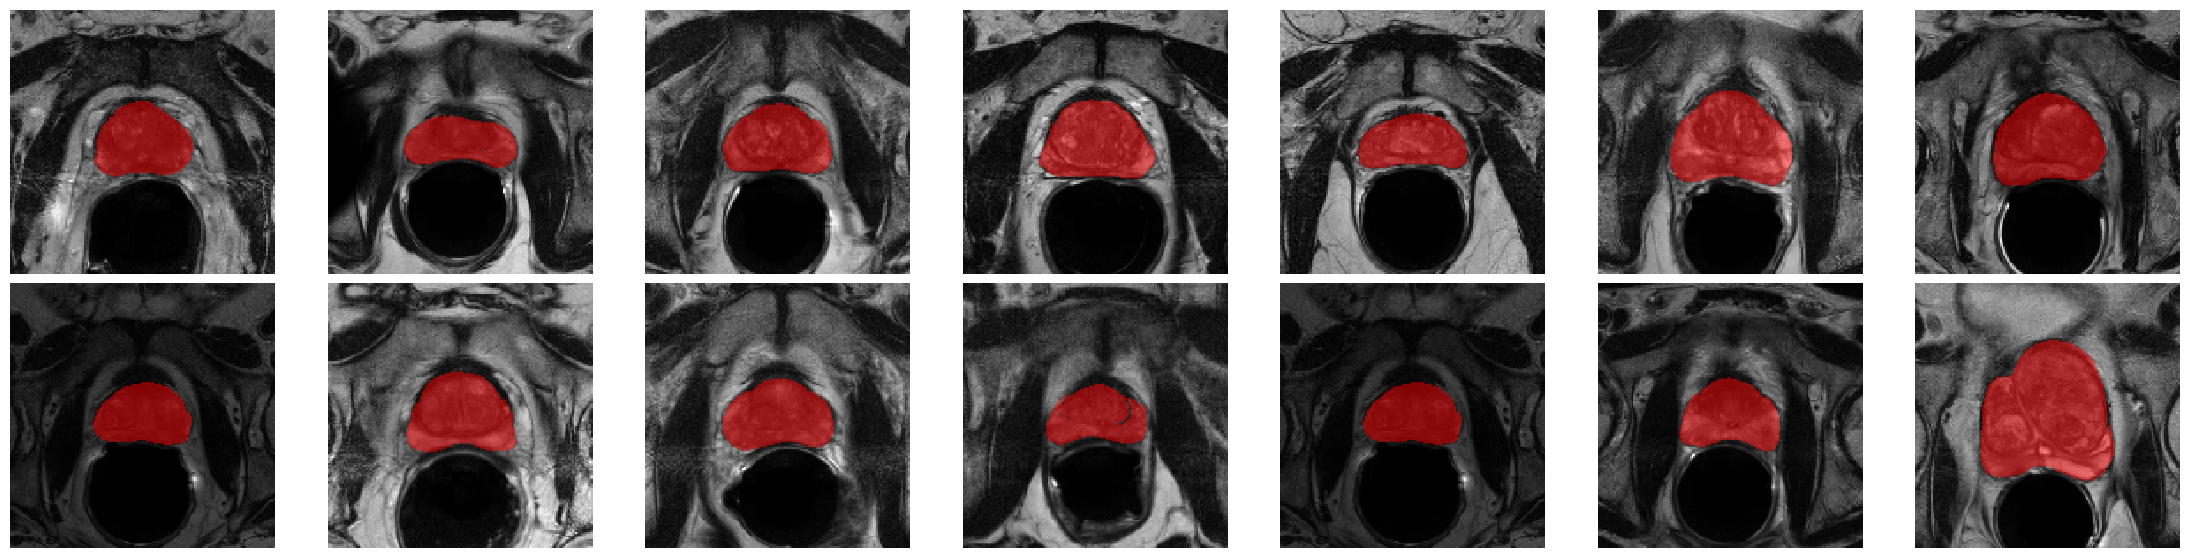

In [748]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (150, 150)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    randpath_num_1 = random.randint(0, len(paths)-1)
    
    imgpath_1 = paths[randpath_num_1] + '/image.nii.gz'
    lblpath_1 = paths[randpath_num_1] + '/seg.nii.gz'
    imgload_1 = nib.load(imgpath_1).get_data()
    lblload_1 = nib.load(lblpath_1).get_data()
    
    center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)
    
    ranslice_1 = round(center_of_mass_1[2])
    imgload_slice_1 = imgload_1[:, :, ranslice_1]
    lblload_slice_1 = lblload_1[:, :, ranslice_1]
    
    center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
    x_centre = round(center_of_mass_slice_1[0])
    y_centre = round(center_of_mass_slice_1[1])
    
    imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
    imgload_slice_1 = imgload_slice_1.T
    lblload_slice_1 = lblload_slice_1.T
    
    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_1 == i
        label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[0, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[0, k].axis('off')
    
    ################################################
    randpath_num_2 = random.randint(0, len(paths)-1)
    
    imgpath_2 = paths[randpath_num_2] + '/image.nii.gz'
    lblpath_2 = paths[randpath_num_2] + '/seg.nii.gz'
    imgload_2 = nib.load(imgpath_2).get_data()
    lblload_2 = nib.load(lblpath_2).get_data()
    
    center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)
    
    ranslice_2 = round(center_of_mass_2[2])
    imgload_slice_2 = imgload_2[:, :, ranslice_2]
    lblload_slice_2 = lblload_2[:, :, ranslice_2]
    
    center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
    x_centre = round(center_of_mass_slice_2[0])
    y_centre = round(center_of_mass_slice_2[1])
    
    imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
    imgload_slice_2 = imgload_slice_2.T
    lblload_slice_2 = lblload_slice_2.T
    
    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_2 == i
        label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[1, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[1, k].axis('off')

# Show the plot
plt.show()

In [764]:
subfolders = next(walk(prostate_dataset_path))[1]
subfolders.remove('BMC')
random.seed(0)

In [765]:
len(subfolders)

5

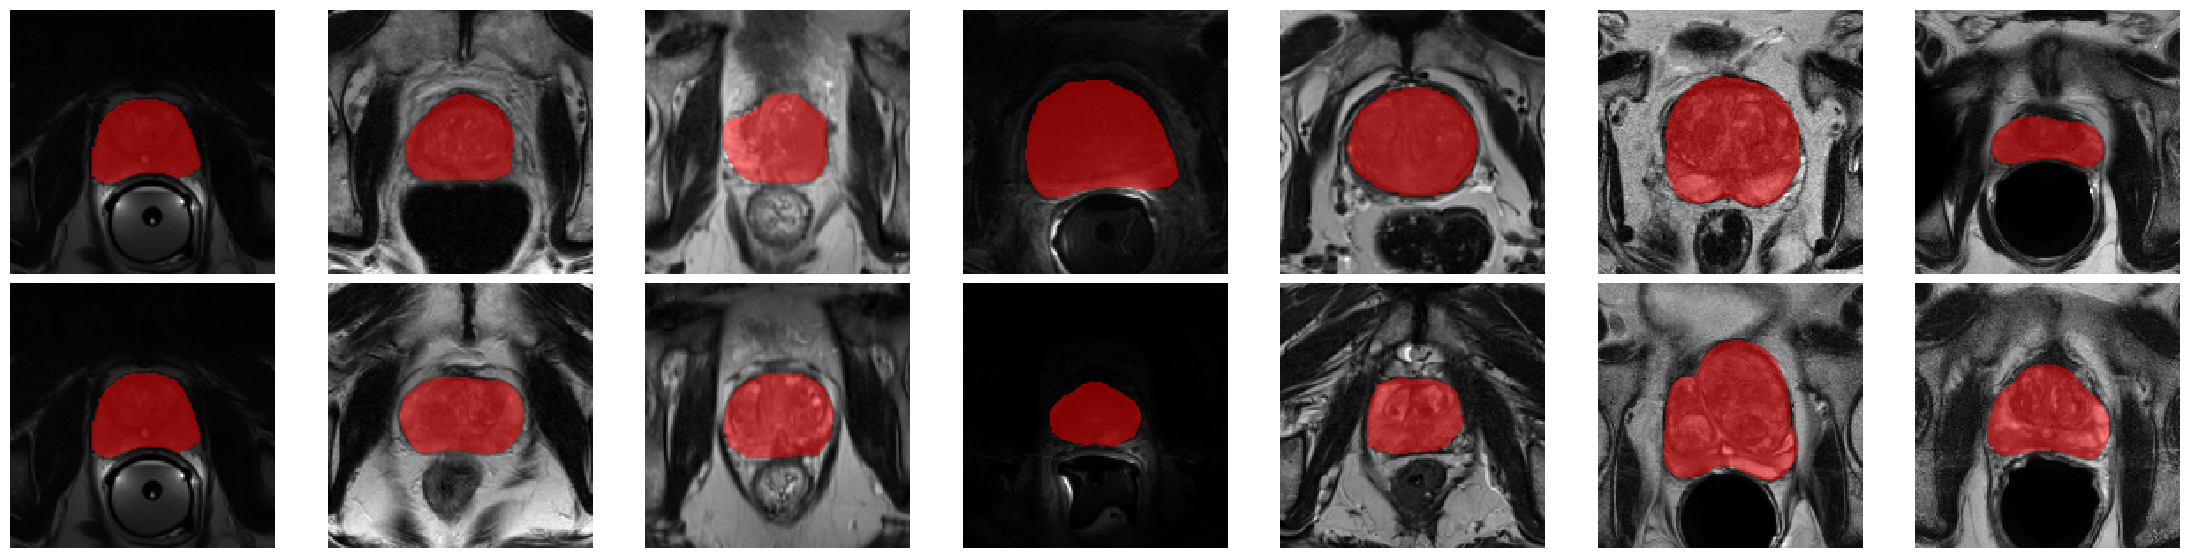

In [766]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (150, 150)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    if k < 5:
        # natural
        subfolder = subfolders[k]
        paths_ = [x[0] for x in walk(prostate_dataset_path + subfolder)]
        paths_ = paths_[1:]
    
        randpath_num_1 = random.randint(0, len(paths_)-1)

        imgpath_1 = paths_[randpath_num_1] + '/image.nii.gz'
        lblpath_1 = paths_[randpath_num_1] + '/seg.nii.gz'
        imgload_1 = nib.load(imgpath_1).get_data()
        lblload_1 = nib.load(lblpath_1).get_data()

        center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)

        ranslice_1 = round(center_of_mass_1[2])
        imgload_slice_1 = imgload_1[:, :, ranslice_1]
        lblload_slice_1 = lblload_1[:, :, ranslice_1]

        center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
        x_centre = round(center_of_mass_slice_1[0])
        y_centre = round(center_of_mass_slice_1[1])

        imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
        imgload_slice_1 = imgload_slice_1.T
        lblload_slice_1 = lblload_slice_1.T

        class_colors = ['', 'red']

        # Display the original image in grayscale
        axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_1 == i
            label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[0, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[0, k].axis('off')

        ################################################
        randpath_num_2 = random.randint(0, len(paths_)-1)

        imgpath_2 = paths_[randpath_num_2] + '/image.nii.gz'
        lblpath_2 = paths_[randpath_num_2] + '/seg.nii.gz'
        imgload_2 = nib.load(imgpath_2).get_data()
        lblload_2 = nib.load(lblpath_2).get_data()

        center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)

        ranslice_2 = round(center_of_mass_2[2])
        imgload_slice_2 = imgload_2[:, :, ranslice_2]
        lblload_slice_2 = lblload_2[:, :, ranslice_2]

        center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
        x_centre = round(center_of_mass_slice_2[0])
        y_centre = round(center_of_mass_slice_2[1])

        imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
        imgload_slice_2 = imgload_slice_2.T
        lblload_slice_2 = lblload_slice_2.T

        class_colors = ['', 'red']

        # Display the original image in grayscale
        axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_2 == i
            label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[1, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[1, k].axis('off')
    
    else:
        # synthetic
        
        randpath_num_1 = random.randint(0, len(paths)-1)
    
        imgpath_1 = paths[randpath_num_1] + '/image.nii.gz'
        lblpath_1 = paths[randpath_num_1] + '/seg.nii.gz'
        imgload_1 = nib.load(imgpath_1).get_data()
        lblload_1 = nib.load(lblpath_1).get_data()
        
        syncond = random.randint(0, 9)
        imgload_1 = get_augm_img(imgload_1, syncond)

        center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)

        ranslice_1 = round(center_of_mass_1[2])
        imgload_slice_1 = imgload_1[:, :, ranslice_1]
        lblload_slice_1 = lblload_1[:, :, ranslice_1]

        center_of_mass_slice_1 = scipy.ndimage.center_of_mass(lblload_slice_1)
        x_centre = round(center_of_mass_slice_1[0])
        y_centre = round(center_of_mass_slice_1[1])

        imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
        imgload_slice_1 = imgload_slice_1.T
        lblload_slice_1 = lblload_slice_1.T

        class_colors = ['', 'red']

        # Display the original image in grayscale
        axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_1 == i
            label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[0, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[0, k].axis('off')

        ################################################
        randpath_num_2 = random.randint(0, len(paths)-1)

        imgpath_2 = paths[randpath_num_2] + '/image.nii.gz'
        lblpath_2 = paths[randpath_num_2] + '/seg.nii.gz'
        imgload_2 = nib.load(imgpath_2).get_data()
        lblload_2 = nib.load(lblpath_2).get_data()
        
        imgload_2 = get_augm_img(imgload_2, syncond)

        center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)

        ranslice_2 = round(center_of_mass_2[2])
        imgload_slice_2 = imgload_2[:, :, ranslice_2]
        lblload_slice_2 = lblload_2[:, :, ranslice_2]

        center_of_mass_slice_2 = scipy.ndimage.center_of_mass(lblload_slice_2)
        x_centre = round(center_of_mass_slice_2[0])
        y_centre = round(center_of_mass_slice_2[1])

        imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
        imgload_slice_2 = imgload_slice_2.T
        lblload_slice_2 = lblload_slice_2.T

        class_colors = ['', 'red']

        # Display the original image in grayscale
        axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

        # Overlay the label map using class-specific colors
        for i in range(len(class_colors)):
            if i == 0:  # Skip label 0
                continue
            mask = lblload_slice_2 == i
            label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
            label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

            axes[1, k].imshow(label_map_rgb, alpha=0.5)

        # Remove axis labels
        axes[1, k].axis('off')
        

# Show the plot
plt.show()

## Visualization of Brain Lesion MRI

In [842]:
brain_dataset_path = "/well/win-fmrib-analysis/users/gqu790/moval/Robust-Medical-Segmentation/data/Dataset_Brain_lesion/"

In [843]:
traindomain = "Siemens Trio"

In [844]:
random.seed(0)

In [845]:
paths = [x[0] for x in walk(brain_dataset_path + traindomain)]
paths = paths[1:]

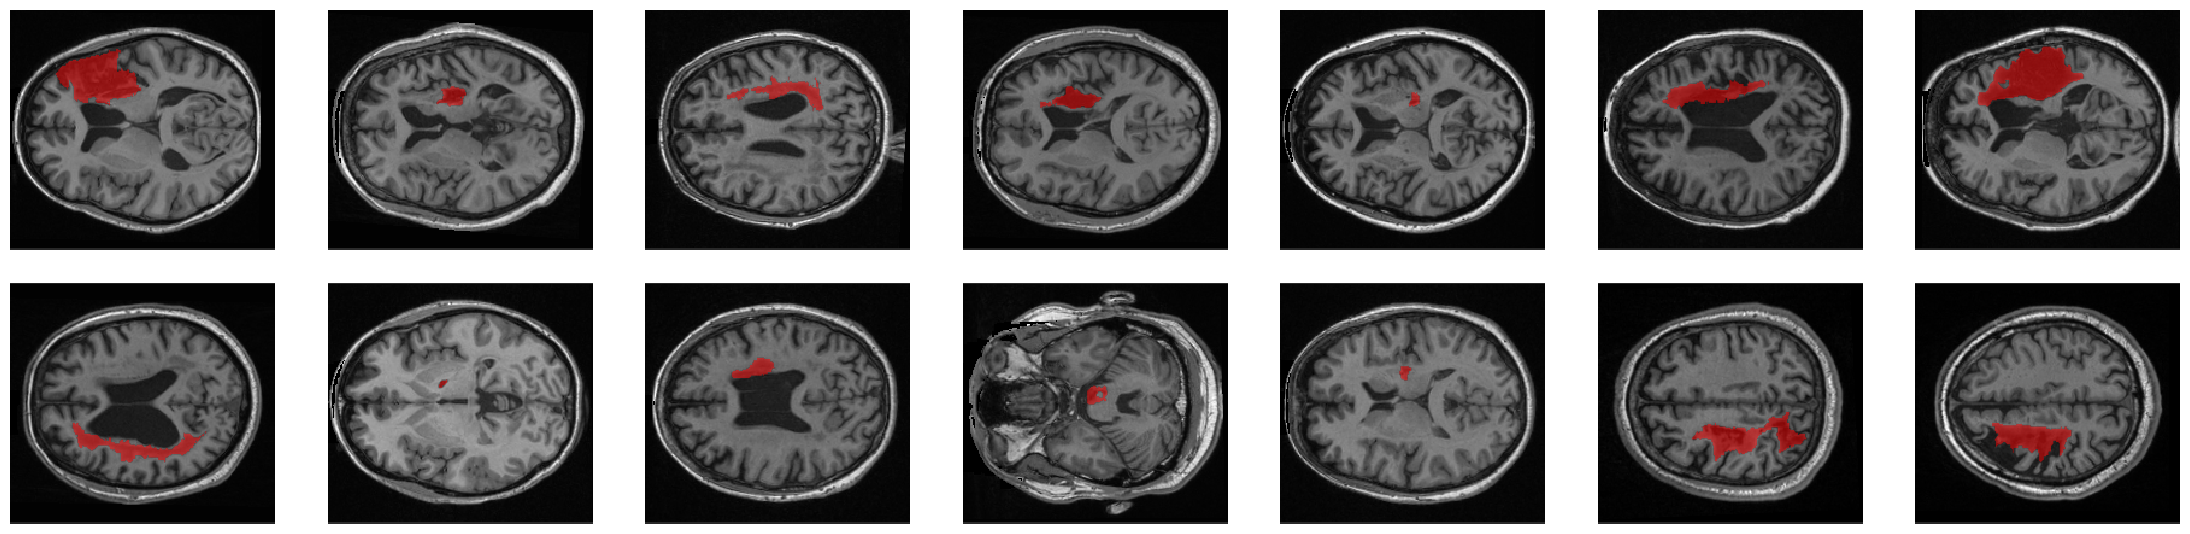

In [846]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (200, 220)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    randpath_num_1 = random.randint(0, len(paths)-1)
    
    imgpath_1 = paths[randpath_num_1] + '/image.nii.gz'
    lblpath_1 = paths[randpath_num_1] + '/seg.nii.gz'
    imgload_1 = nib.load(imgpath_1).get_data()
    lblload_1 = nib.load(lblpath_1).get_data()
    
    center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)
    
    ranslice_1 = round(center_of_mass_1[2])
    imgload_slice_1 = imgload_1[:, :, ranslice_1]
    lblload_slice_1 = lblload_1[:, :, ranslice_1]
    
    x_centre = round(lblload_slice_1.shape[0]/2)
    y_centre = round(lblload_slice_1.shape[1]/2)
    
    imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
    imgload_slice_1 = imgload_slice_1[:, ::-1]
    lblload_slice_1 = lblload_slice_1[:, ::-1]
    
    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_1 == i
        label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[0, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[0, k].axis('off')
    
    ################################################
    randpath_num_2 = random.randint(0, len(paths)-1)
    
    imgpath_2 = paths[randpath_num_2] + '/image.nii.gz'
    lblpath_2 = paths[randpath_num_2] + '/seg.nii.gz'
    imgload_2 = nib.load(imgpath_2).get_data()
    lblload_2 = nib.load(lblpath_2).get_data()
    
    center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)
    
    ranslice_2 = round(center_of_mass_2[2])
    imgload_slice_2 = imgload_2[:, :, ranslice_2]
    lblload_slice_2 = lblload_2[:, :, ranslice_2]
    
    x_centre = round(lblload_slice_2.shape[0]/2)
    y_centre = round(lblload_slice_2.shape[1]/2)
    
    imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
    imgload_slice_2 = imgload_slice_2[:, ::-1]
    lblload_slice_2 = lblload_slice_2[:, ::-1]
    
    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_2 == i
        label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[1, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[1, k].axis('off')

# Show the plot
plt.show()

In [859]:
subfolders = next(walk(brain_dataset_path))[1]
subfolders.remove(traindomain)
subfolders.remove('Siemens Sonata')
random.seed(0)

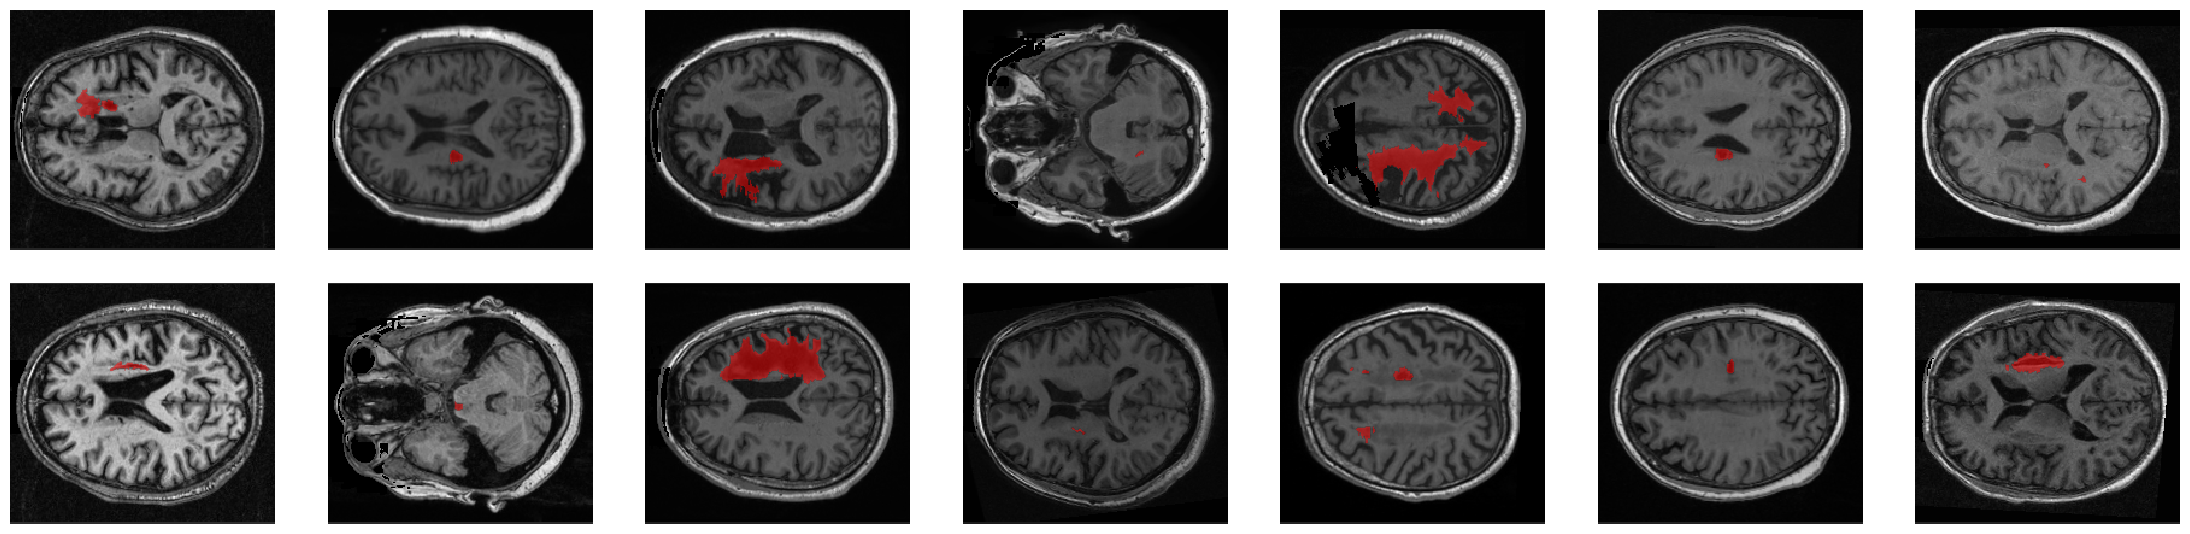

In [860]:
# Display the images side by side
fig, axes = plt.subplots(2, 7, figsize=(28, 8))
plt.subplots_adjust(hspace=-0.2)  # Adjust the value as needed

# Crop size
crop_size = (200, 220)
half_crop_size = (crop_size[0] // 2, crop_size[1] // 2)


for k in range(7):
    
    # natural
    subfolder = subfolders[k]
    paths_ = [x[0] for x in walk(brain_dataset_path + subfolder)]
    paths_ = paths_[1:]

    randpath_num_1 = random.randint(0, len(paths_)-1)

    imgpath_1 = paths_[randpath_num_1] + '/image.nii.gz'
    lblpath_1 = paths_[randpath_num_1] + '/seg.nii.gz'
    imgload_1 = nib.load(imgpath_1).get_data()
    lblload_1 = nib.load(lblpath_1).get_data()

    center_of_mass_1 = scipy.ndimage.center_of_mass(lblload_1)

    ranslice_1 = round(center_of_mass_1[2])
    imgload_slice_1 = imgload_1[:, :, ranslice_1]
    lblload_slice_1 = lblload_1[:, :, ranslice_1]

    x_centre = round(lblload_slice_1.shape[0]/2)
    y_centre = round(lblload_slice_1.shape[1]/2)

    imgload_slice_1, lblload_slice_1 = crop_and_pad_image(imgload_slice_1, lblload_slice_1, crop_size, x_centre, y_centre)
    imgload_slice_1 = imgload_slice_1[:, ::-1]
    lblload_slice_1 = lblload_slice_1[:, ::-1]

    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[0, k].imshow(imgload_slice_1, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_1 == i
        label_map_rgb = np.zeros((*lblload_slice_1.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[0, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[0, k].axis('off')

    ################################################
    randpath_num_2 = random.randint(0, len(paths_)-1)

    imgpath_2 = paths_[randpath_num_2] + '/image.nii.gz'
    lblpath_2 = paths_[randpath_num_2] + '/seg.nii.gz'
    imgload_2 = nib.load(imgpath_2).get_data()
    lblload_2 = nib.load(lblpath_2).get_data()

    center_of_mass_2 = scipy.ndimage.center_of_mass(lblload_2)

    ranslice_2 = round(center_of_mass_2[2])
    imgload_slice_2 = imgload_2[:, :, ranslice_2]
    lblload_slice_2 = lblload_2[:, :, ranslice_2]

    x_centre = round(lblload_slice_2.shape[0]/2)
    y_centre = round(lblload_slice_2.shape[1]/2)

    imgload_slice_2, lblload_slice_2 = crop_and_pad_image(imgload_slice_2, lblload_slice_2, crop_size, x_centre, y_centre)
    imgload_slice_2 = imgload_slice_2[:, ::-1]
    lblload_slice_2 = lblload_slice_2[:, ::-1]

    class_colors = ['', 'red']

    # Display the original image in grayscale
    axes[1, k].imshow(imgload_slice_2, cmap='gray', interpolation='none')

    # Overlay the label map using class-specific colors
    for i in range(len(class_colors)):
        if i == 0:  # Skip label 0
            continue
        mask = lblload_slice_2 == i
        label_map_rgb = np.zeros((*lblload_slice_2.shape, 4))
        label_map_rgb[mask, :] = plt.cm.colors.to_rgba(class_colors[i])

        axes[1, k].imshow(label_map_rgb, alpha=0.5)

    # Remove axis labels
    axes[1, k].axis('off')
        

# Show the plot
plt.show()